# ABRKAOUI ABDELLAH - GROUPE 1 - IISE


## Série de Travaux Pratiques N° 2

## PARTIE 1 

### objectif : Développement la Descente de Gradient sur un modèle de régression linéaire simplee from scratch , la fonction f(x) = ax+b.

### 1 : La fonction du coût utilisé afin de calculer les erreurs pour le cas de f(x) = ax+b 

In [2]:
## J(a,b) = 1/2m Sum ((ax+b - y)^2)

## ou a et b se sont les paramètres du modèle. 

### 2 : Fonction Qui calcule la fonction du coût

In [13]:
## Importation des bibliothèques

import numpy as np
import matplotlib.pyplot as plt

In [14]:
def compute_error (a,b,points): 
    totalError = 0
    for i in range(0,len(points)):
        x = points[i,0]
        y = points[i,1]

        totalError+=((a*x+b)-y)**2
    return totalError/(2*float(len(points)))    
    

### 3 : fonction qui calcule les nouveaux a et b.

In [15]:
#1.### Voila Notre gradient, en utilisant les dérivées partielles.
###  DJ(a,b)/DJa = 1/m Sum ((ax+b - y)*x)
###  DJ(a,b)/DJb = 1/m Sum (ax+b - y)

#2.### Voila Notre Descent de gradient qui calcule les nouveaux a et b mises à jour
### new_a = a - learning_rate * DJ(a,b)/DJa
### new_b = b - learning_rate * DJ(a,b)/DJb

In [34]:
def calcul_gradient(a_current, b_current, points, learning_rate):
    m = float(len(points))
    a_gradient = 0
    b_gradient = 0

    for i in range(0,len(points)):
        x = points[i,0]
        y = points[i,1]
        
        ##Calculons les gradients
        b_gradient+=(1/m)*((a_current*x+b_current)-y)
        a_gradient+=(1/m)*x*((a_current*x+b_current)-y)

    ##Calculons le descent de gradient
    new_b=b_current-(learning_rate*b_gradient)
    new_a=a_current-(learning_rate*a_gradient)
    return [new_a,new_b]

    

### 4 : Fonction qui calculer les nouveaux a et b pour n itérations

In [35]:
def GD_runner(points, a_init, b_init, learning_rate, num_iteration):
    # initialisation de a et b
    a=a_init
    b=b_init
    # variable initialiser à 0 pour stocker l'historique des coûts à chaque itération
    cost_history = np.zeros(num_iteration)
    
    for i in range(num_iteration):
        # met à jour les valeurs de b et w en utilisant calcul_gradient qui utilise l'algorithme de descente de gradient.
        a,b=calcul_gradient(a,b,np.array(points),learning_rate)

        # affichage de fonction coût , et des paramètres a et b
        print("Iteration Numero :",i)
        print("Fonction du cout = ", compute_error(a,b,np.array(points)))
        cost_history[i] = compute_error(a,b,np.array(points))
        print("a=", a)
        print("b=", b)

    # visualisation de graphique de l'historique des coûts au fil des itérations.
    plt.plot(range(num_iteration), cost_history)
    # afficher le graphe
    plt.show()
    # retourner les derniers a et b apres avoir terminer les nombres des itérations
    return [a,b]

### 5 : Visualisation de l'évolution de la fonction du coût au des n itérations.

In [44]:
### pour : learning_rate = 0.0001 et nombre_itération = 100 :
def run():

# Initialiser 100 points
    x=np.linspace(1,10,100)
    y=np.linspace(1,10,100)
    
# array pour stocker les valeurs de x et y
    array=[]

    for i in np.arange(100):
        for j in np.arange(100):
            p=[x[i],y[i]]
            array.append(p)

# initialisons les parametres learning rate , a , b et le nombre d'itération
    learning_rate=0.0001
    init_a=0
    init_b=0
    num_iteration=100

# Appelle la fonction GD_runner avec les paramètres définis précédemment 
    [a,b]=GD_runner(array,init_a,init_b,learning_rate,num_iteration)

    #Trace les points initiaux 
    plt.figure()
    plt.scatter(x, y)

    # Calcule les valeurs prédites par la fonction linéaire f(x)= ax+b
    y2=b+a*x
    #Trace les valeurs prédites sur le même graphique
    plt.scatter(x,y2)
    print("last_a=", a)
    print("last_b=", b)



Iteration Numero : 0
Fonction du cout =  18.42751332832884
a= 0.0037136363636363777
b= 0.0005500000000000077
Iteration Numero : 1
Fonction du cout =  18.287910623990804
a= 0.0074131791322313775
b= 0.0010979025000000145
Iteration Numero : 2
Fonction du cout =  18.14936563015881
a= 0.0110986817978972
b= 0.0016437154612272851
Iteration Numero : 3
Fonction du cout =  18.011870333005746
a= 0.014770197649716805
b= 0.0021874468146923197
Iteration Numero : 4
Fonction du cout =  17.87541677941964
a= 0.0184277797745151
b= 0.0027291044613035045
Iteration Numero : 5
Fonction du cout =  17.739997076546935
a= 0.02207148105762604
b= 0.0032686962719813807
Iteration Numero : 6
Fonction du cout =  17.605603391335425
a= 0.02570135418365785
b= 0.0038062300877724836
Iteration Numero : 7
Fonction du cout =  17.47222795008109
a= 0.02931745163725474
b= 0.004341713719962713
Iteration Numero : 8
Fonction du cout =  17.339863037976706
a= 0.032919825703855744
b= 0.004875154950190232
Iteration Numero : 9
Fonction 

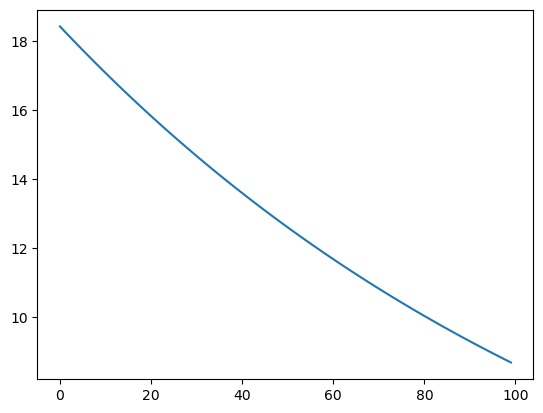

last_a= 0.30950859314820856
last_b= 0.045794359612294215


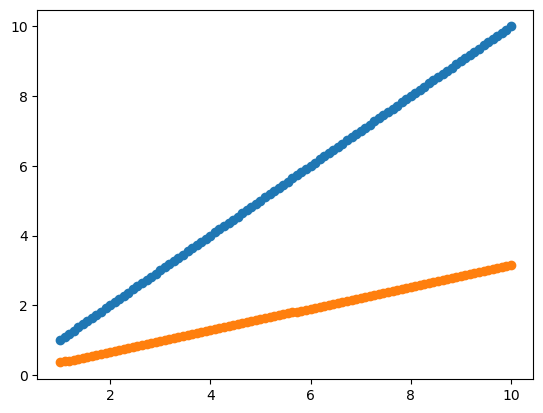

In [45]:
run()

### 6 : autre valeur pour learning_rate et nombre_itération

In [46]:
### pour : learning_rate = 0.001 et nombre_itération = 1000 :
def run():

# Initialiser 100 points
    x=np.linspace(1,10,100)
    y=np.linspace(1,10,100)
    
# array pour stocker les valeurs de x et y
    array=[]

    for i in np.arange(100):
        for j in np.arange(100):
            p=[x[i],y[i]]
            array.append(p)

# initialisons les parametres learning rate , a , b et le nombre d'itération
    learning_rate=0.001
    init_a=0
    init_b=0
    num_iteration=1000

# Appelle la fonction GD_runner avec les paramètres définis précédemment 
    [a,b]=GD_runner(array,init_a,init_b,learning_rate,num_iteration)

    #Trace les points initiaux 
    plt.figure()
    plt.scatter(x, y)

    # Calcule les valeurs prédites par la fonction linéaire f(x)= ax+b
    y2=b+a*x
    #Trace les valeurs prédites sur le même graphique
    plt.scatter(x,y2)
    print("last_a=", a)
    print("last_b=", b)



Iteration Numero : 0
Fonction du cout =  17.185568370069728
a= 0.03713636363636377
b= 0.005500000000000078
Iteration Numero : 1
Fonction du cout =  15.905917097230317
a= 0.07286336776859562
b= 0.01079025000000011
Iteration Numero : 2
Fonction du cout =  14.721560480612396
a= 0.10723450450873484
b= 0.0158787112272728
Iteration Numero : 3
Fonction du cout =  13.625401995791101
a= 0.14030123567954647
b= 0.020773042741247496
Iteration Numero : 4
Fonction du cout =  12.610873591403264
a= 0.17211306987400704
b= 0.02548061290226879
Iteration Numero : 5
Fonction du cout =  11.671896334144794
a= 0.20271763658999642
b= 0.030008510405059537
Iteration Numero : 6
Fonction du cout =  10.802843984497086
a= 0.23216075755122187
b= 0.03436355489340955
Iteration Numero : 7
Fonction du cout =  9.998509284948872
a= 0.26048651532115547
b= 0.03855230717198442
Iteration Numero : 8
Fonction du cout =  9.254072758707302
a= 0.28773731931273794
b= 0.04258107903054609
Iteration Numero : 9
Fonction du cout =  8.565

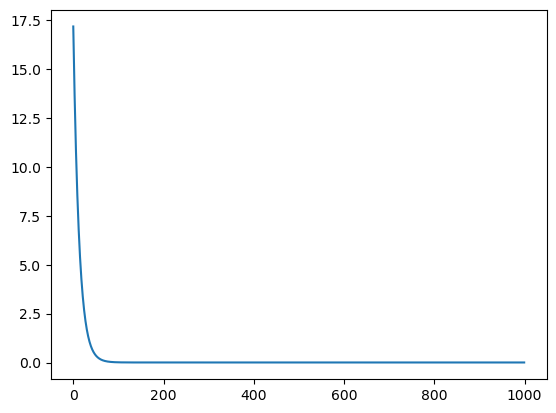

last_a= 0.9819256632135951
last_b= 0.12144287650028862


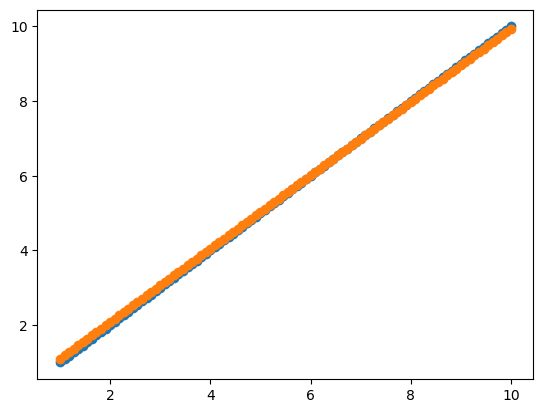

In [47]:
run()

In [48]:
### Enfin apres avoir entrainer notre model , on obitien que learning_rate = 0.001 et nombre_itération = 1000 sont les meilleur parametre pour minimiser
## la fonction couts et avoir un bon model.

# PARTIE 2 

### Objectif de cette partie est de Développer programme de Machine Learning en utilisant make_regression

### 1 : imporation des bibliothèques numpy, matplotlib, sklearn.

In [55]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

### 2 : Créeons notre dataset en utilisant make_regression

In [56]:
## make_regression permet de générer une dataset aléatoire
x, y = make_regression(n_samples = 100, n_features = 1, noise = 10)

### 3 : 3- Visualisation des données en utilisant la fonction plt.scatter.

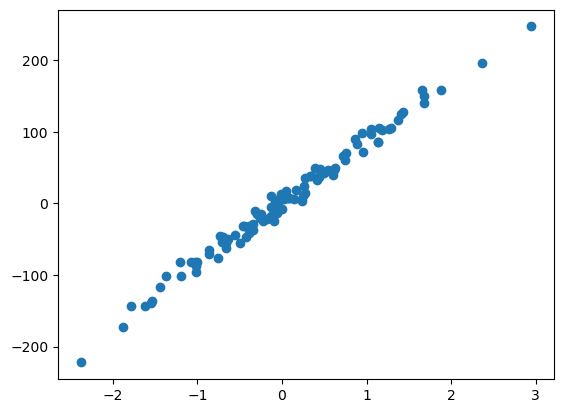

In [57]:
plt.scatter(x, y)

### 4 : Définissons un modèle avec SGDRegressor() sur 100 itérations avec un Learning rate de 0.0001.

In [58]:
## en premier en import SGDRegressor from sklearn.linear_model
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(max_iter = 100, eta0 = 0.0001)

### 5 : Entraînement de modèle en utilisant la méthode fit().

In [60]:
model.fit(x,y)

C:\Users\MOUAD TECH\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, max_iter=100)

### 6 : Calculons la précision de modèle en utilisant la fonction score()

In [61]:
print("le coefficient de détermination de notre modèle est : ",model.score(x, y))

le coefficient de détermination de notre modèle est :  0.2093028898695899


### 7 : On fassions des nouvelles prédictions avec la fonction predict() et on traceons les résultats.

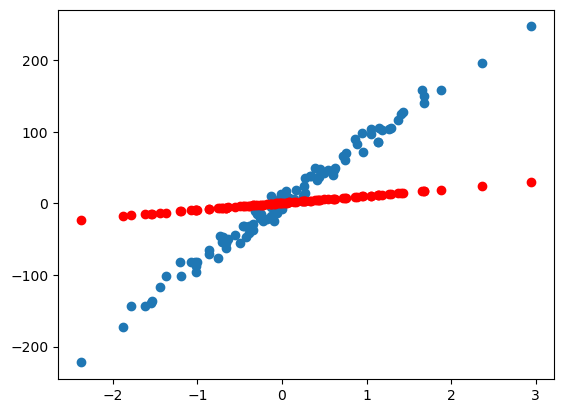

In [63]:
plt.scatter(x,y)
plt.scatter(x,model.predict(x),c='r')

### 8 : entraînement du sur 1000 itérations avec un Learning rate de 0.001.

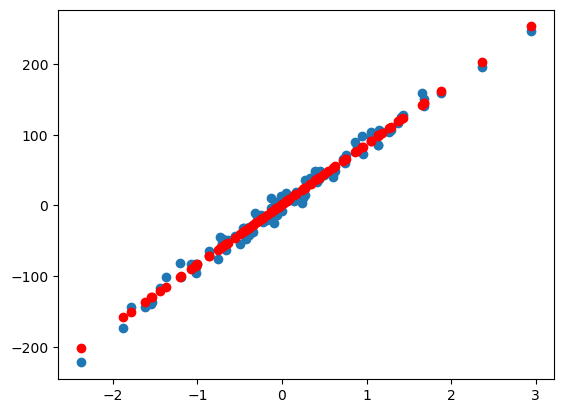

In [65]:
model = SGDRegressor(max_iter = 1000, eta0 = 0.001)
model.fit(x,y)
plt.scatter(x,y)
plt.scatter(x,model.predict(x),c='r')

### ==> : Enfin , On constate que notre modèle est bien entrainer aprés avoir changer et tester le nombre des itération et le taux de learning rate